In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

# Deutsch Algorithm

**Problem**: Consider an oracle evaluating a 1 bit boolean function $f: \{ 0,1\} \rightarrow \{ 0,1\}$ we want to know if the function is constant ( $f(0) = 0$ and $f(1) = 1$) or balanced ( $f(0) = 1$ and $f(1) = 0$). 

For a classical computer it is needed two queries, that means, you need to test 2 diferent bits and see the outputs, for instance if $f(0) = 0$ and $f(1) = 1$ you know that the function is constant.

For a quantum computer this can be done with only one query. This is done with the Deutsch algorithm, the idea is to check if it is balanced, if it is not balanced it is constant.

In [12]:
%matplotlib inline
import qiskit as Qsk
import numpy as np
import matplotlib.pyplot as plt

In [13]:
Q_Circuit = Qsk.QuantumCircuit(2)

We start with the state $\left| \psi_0 \right>$ $= \left| 00 \right>$ 

In [14]:
Q_Circuit.x(1);

Since the X gate is:

\begin{equation}
X = 
 \begin{pmatrix} 
0 & 1\\
1 & 0 \\
\end{pmatrix}
\end{equation}

Now the state is $\left| \psi_1 \right>$ $= \left| 01 \right>$

In [15]:
Q_Circuit.h(0);
Q_Circuit.h(1);

Since the Haddamard gate is given by the following matrix on the computational basis:

\begin{equation}
H = \frac{1}{\sqrt2}
 \begin{pmatrix} 
1 & 1\\
1 & -1 \\
\end{pmatrix}
\end{equation}

Now the state is $\left| \psi_2 \right> =$ $\frac{1}{2} \left( \left| 0 \right> + \left| 1 \right> \right) \otimes \left( \left| 0 \right> - \left| 1 \right> \right) $

In [16]:
Q_Circuit.cx(0,1);

$\left| \psi_3 \right> = $ $ \frac{1}{2} \left[ 
\left| 0 \right> \otimes \left( \left| 0 \bigoplus 0 \right> - \left| 1 \bigoplus 0 \right> \right) 
+ \left| 1 \right> \otimes \left( \left| 0 \bigoplus 1 \right> - \left| 1 \bigoplus 1 \right> \right)
\right]$

$\left| \psi_3 \right> = $ $ \frac{1}{2} \left[ 
\left| 0 \right> \otimes \left( \left| 0 \right> - \left| 1  \right> \right) 
+ \left| 1 \right> \otimes \left( \left|  1 \right> - \left| 0 \right> \right)
\right]$

In [17]:
Q_Circuit.h(0);

After the Hadamard on the first qubit, we have that

$\left| \psi_4 \right> = $ $ \frac{1}{2} \left[ 
\left( \left| 0 \right> + \left| 1 \right> \right) \otimes \left( \left| 0 \right> - \left| 1  \right> \right) 
+ \left( \left| 0 \right> - \left| 1 \right> \right) \otimes \left( \left|  1 \right> - \left| 0 \right> \right)
\right]$

$\left| \psi_4 \right> = $ $ \frac{1}{\sqrt2} 
\left| 1 \right> \otimes
\left( 
\left| 0 \right> - \left| 1 \right>
\right)$

## Building a measurement circuit and making experiments

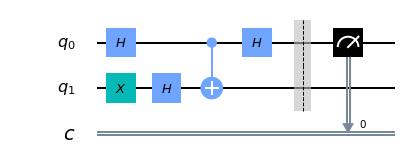

In [60]:
circ_meas = Qsk.QuantumCircuit(2, 1)
circ_meas.barrier(range(2))
circ_meas.measure(qubit=0,cbit=0)
#circ_meas.measure(qubit=1,cbit=1)
final_circ = Q_Circuit + circ_meas
final_circ.draw(output='mpl')

In [61]:
backend_sim = Qsk.Aer.get_backend('qasm_simulator')
job_sim = Qsk.execute(final_circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(final_circ)
print(counts)

{'1': 1024}


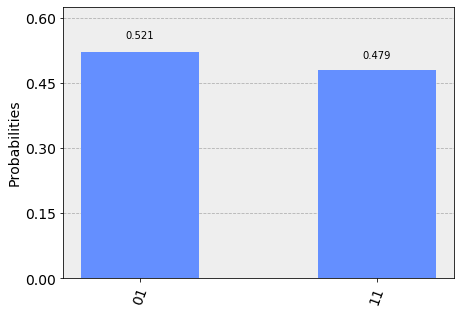

In [35]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
IBMQ.load_account();
provider = IBMQ.get_provider(group='open')

In [ ]:
from Q_Functions import Print_status
Print_status()